<a href="https://colab.research.google.com/github/gsnsg/DL/blob/master/PyTorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.utils as vutils
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import os

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.5], [0.5])])

if not os.path.exists("/data/"):
  os.mkdir("/data/")

dataset1 = torchvision.datasets.MNIST(root="/data/", train=True, download=True,  transform=transform)
dataset2 = torchvision.datasets.MNIST(root="/data/", train=False, download=True,  transform=transform)


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw


Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw


Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
train_loader = DataLoader(dataset1, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset2, batch_size=32, shuffle=True)


In [5]:
print(len(train_loader), len(test_loader))

1875 313


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


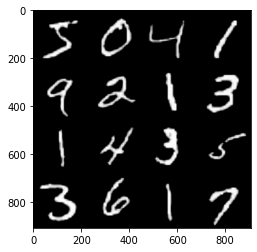

In [26]:
import numpy as np
import matplotlib.pyplot as plt

sample_data = next(iter(train_loader))
sample_data = sample_data[0][:16]
grid_image = vutils.make_grid(sample_data, nrow = 4, padding = 2)
plt.imshow(grid_image.permute(1, 2, 0))
plt.show()

In [9]:
class Model(nn.Module):
  def __init__(self, in_c = 1, out_c = 10):
    super(Model, self).__init__()
    self.conv1 = nn.Conv2d(in_c, 64, 3)
    self.conv2 = nn.Conv2d(64, 32, 3)
    self.lin = nn.Linear(32 * 24 * 24, 10)
    self.relu = nn.ReLU(inplace = True)


  def forward(self, x):
    out = self.relu(self.conv1(x))
    out = self.relu(self.conv2(out))
    out = out.view(-1, 32 * 24 * 24)
    out = self.lin(out)
    return out

In [20]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 20
batch_size = 128
learning_rate = 0.001


train_dataset = torchvision.datasets.MNIST(root="./data", train=True,
                                           transform=transform, download=True)


test_dataset = torchvision.datasets.MNIST(root="./data", train=False,
                                           transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [21]:
model = Model().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [22]:
n_total_steps = len(train_loader)
loss_values = []
for epoch in range(num_epochs):
  currLoss = 0
  for i, (images, labels) in enumerate(train_loader):  
      # origin shape: [100, 1, 28, 28]
      # resized: [100, 784]
      images = images.to(device)
      labels = labels.to(device)
      
      # Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)
      
      # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      currLoss += loss.item()
  loss_values.append(currLoss)

  print(f"Epoch : {epoch + 1}, Loss: {currLoss}")


Epoch : 1, Loss: 75.50493034720421
Epoch : 2, Loss: 23.715323369018734
Epoch : 3, Loss: 16.921355459140614
Epoch : 4, Loss: 12.423711534705944
Epoch : 5, Loss: 8.82511436555069
Epoch : 6, Loss: 6.549725760763977
Epoch : 7, Loss: 4.8222161474695895
Epoch : 8, Loss: 4.114943571519689
Epoch : 9, Loss: 4.453885455459385
Epoch : 10, Loss: 3.3211707969567215
Epoch : 11, Loss: 2.830623243289665
Epoch : 12, Loss: 1.9765623756957211
Epoch : 13, Loss: 3.288488949090606
Epoch : 14, Loss: 1.0724585450639097
Epoch : 15, Loss: 1.2562541694621814
Epoch : 16, Loss: 2.6176790680962085
Epoch : 17, Loss: 1.9446727416180352
Epoch : 18, Loss: 1.0388571412291014
Epoch : 19, Loss: 1.9545065002196225
Epoch : 20, Loss: 1.71006868560292


In [30]:
import numpy as np

model.eval()

numCorrect = 0
with torch.no_grad():
  for X, target in test_loader:
    images = X.to(device)
    target = target.to(device)
    out = model(images).detach()
    _, ind = torch.max(out, dim=1)
    print(torch.sum(ind == target))

tensor(128, device='cuda:0')
tensor(128, device='cuda:0')
tensor(128, device='cuda:0')
tensor(128, device='cuda:0')
tensor(127, device='cuda:0')
tensor(127, device='cuda:0')
tensor(127, device='cuda:0')
tensor(127, device='cuda:0')
tensor(128, device='cuda:0')
tensor(127, device='cuda:0')
tensor(126, device='cuda:0')
tensor(127, device='cuda:0')
tensor(128, device='cuda:0')
tensor(128, device='cuda:0')
tensor(127, device='cuda:0')
tensor(127, device='cuda:0')
tensor(126, device='cuda:0')
tensor(127, device='cuda:0')
tensor(124, device='cuda:0')
tensor(127, device='cuda:0')
tensor(125, device='cuda:0')
tensor(127, device='cuda:0')
tensor(127, device='cuda:0')
tensor(125, device='cuda:0')
tensor(125, device='cuda:0')
tensor(126, device='cuda:0')
tensor(125, device='cuda:0')
tensor(128, device='cuda:0')
tensor(121, device='cuda:0')
tensor(125, device='cuda:0')
tensor(125, device='cuda:0')
tensor(128, device='cuda:0')
tensor(126, device='cuda:0')
tensor(127, device='cuda:0')
tensor(128, de

In [29]:
print(len(test_loader))

79
